In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from tqdm import tqdm
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Training dataset size:  60000
Validation dataset size:  9000
Testing dataset size:  1000


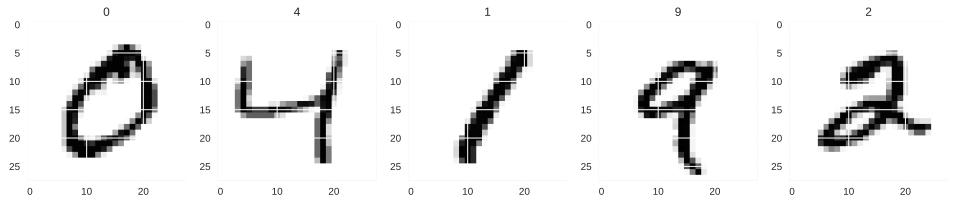

In [ ]:
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))

mnist_valset, mnist_testset = torch.utils.data.random_split(mnist_testset, [int(0.9 * len(mnist_testset)), int(0.1 * len(mnist_testset))])

train_dataloader = torch.utils.data.DataLoader(mnist_trainset, batch_size=256, shuffle=True)
val_dataloader = torch.utils.data.DataLoader(mnist_valset, batch_size=32, shuffle=False)
test_dataloader = torch.utils.data.DataLoader(mnist_testset, batch_size=1, shuffle=False)

print("Training dataset size: ", len(mnist_trainset))
print("Validation dataset size: ", len(mnist_valset))
print("Testing dataset size: ", len(mnist_testset))

# visualize data
fig=plt.figure(figsize=(20, 10))
for i in range(1, 6):
    img = transforms.ToPILImage(mode='L')(mnist_trainset[i][0])
    fig.add_subplot(1, 6, i)
    plt.title(mnist_trainset[i][1])
    plt.imshow(img)
plt.show()

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

In [ ]:
model = Net().to(device)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

if (torch.cuda.is_available()):
    model.cuda()

no_epochs = 100
train_loss = list()
val_loss = list()
best_val_loss = 1
for epoch in range(no_epochs):
    total_train_loss = 0
    total_val_loss = 0

    model.train()
    # training
    for itr, (image, label) in tqdm(enumerate(train_dataloader)):

        if (torch.cuda.is_available()):
            image = image.cuda()
            label = label.cuda()

        optimizer.zero_grad()

        pred = model(image)

        loss = criterion(pred, label)
        total_train_loss += loss.item()

        loss.backward()
        optimizer.step()

    total_train_loss = total_train_loss / (itr + 1)
    train_loss.append(total_train_loss)

    # validation
    model.eval()
    total = 0
    for itr, (image, label) in enumerate(val_dataloader):

        if (torch.cuda.is_available()):
            image = image.cuda()
            label = label.cuda()

        pred = model(image)

        loss = criterion(pred, label)
        total_val_loss += loss.item()

        pred = torch.nn.functional.softmax(pred, dim=1)
        for i, p in enumerate(pred):
            if label[i] == torch.max(p.data, 0)[1]:
                total = total + 1

    accuracy = total / len(mnist_valset)

    total_val_loss = total_val_loss / (itr + 1)
    val_loss.append(total_val_loss)

    print('\nEpoch: {}/{}, Train Loss: {:.8f}, Val Loss: {:.8f}, Val Accuracy: {:.8f}'.format(epoch + 1, no_epochs, total_train_loss, total_val_loss, accuracy))

    if total_val_loss < best_val_loss:
        best_val_loss = total_val_loss
        print("Saving the model state dictionary for Epoch: {} with Validation loss: {:.8f}".format(epoch + 1, total_val_loss))
        torch.save(model.state_dict(), "model.pth")



235it [00:17, 13.77it/s]



Epoch: 1/100, Train Loss: 0.85473551, Val Loss: 0.17193877, Val Accuracy: 0.95144444
Saving the model state dictionary for Epoch: 1 with Validation loss: 0.17193877


235it [00:08, 26.70it/s]



Epoch: 2/100, Train Loss: 0.33790826, Val Loss: 0.11259232, Val Accuracy: 0.96388889
Saving the model state dictionary for Epoch: 2 with Validation loss: 0.11259232


235it [00:08, 27.97it/s]



Epoch: 3/100, Train Loss: 0.26663555, Val Loss: 0.08699200, Val Accuracy: 0.97288889
Saving the model state dictionary for Epoch: 3 with Validation loss: 0.08699200


235it [00:07, 31.02it/s]



Epoch: 4/100, Train Loss: 0.23217564, Val Loss: 0.07967836, Val Accuracy: 0.97455556
Saving the model state dictionary for Epoch: 4 with Validation loss: 0.07967836


235it [00:08, 26.79it/s]



Epoch: 5/100, Train Loss: 0.21074792, Val Loss: 0.06897489, Val Accuracy: 0.97744444
Saving the model state dictionary for Epoch: 5 with Validation loss: 0.06897489


235it [00:08, 26.65it/s]



Epoch: 6/100, Train Loss: 0.19367095, Val Loss: 0.06156677, Val Accuracy: 0.97933333
Saving the model state dictionary for Epoch: 6 with Validation loss: 0.06156677


235it [00:09, 24.94it/s]



Epoch: 7/100, Train Loss: 0.18057370, Val Loss: 0.05778673, Val Accuracy: 0.98133333
Saving the model state dictionary for Epoch: 7 with Validation loss: 0.05778673


235it [00:08, 26.51it/s]



Epoch: 8/100, Train Loss: 0.17154426, Val Loss: 0.05401631, Val Accuracy: 0.98266667
Saving the model state dictionary for Epoch: 8 with Validation loss: 0.05401631


235it [00:07, 30.20it/s]



Epoch: 9/100, Train Loss: 0.16451762, Val Loss: 0.05070600, Val Accuracy: 0.98344444
Saving the model state dictionary for Epoch: 9 with Validation loss: 0.05070600


235it [00:08, 27.10it/s]



Epoch: 10/100, Train Loss: 0.15654348, Val Loss: 0.04997632, Val Accuracy: 0.98422222
Saving the model state dictionary for Epoch: 10 with Validation loss: 0.04997632


235it [00:08, 26.68it/s]



Epoch: 11/100, Train Loss: 0.15480783, Val Loss: 0.04779072, Val Accuracy: 0.98533333
Saving the model state dictionary for Epoch: 11 with Validation loss: 0.04779072


235it [00:08, 27.80it/s]



Epoch: 12/100, Train Loss: 0.14899789, Val Loss: 0.04470874, Val Accuracy: 0.98555556
Saving the model state dictionary for Epoch: 12 with Validation loss: 0.04470874


235it [00:07, 30.64it/s]



Epoch: 13/100, Train Loss: 0.14220174, Val Loss: 0.04705728, Val Accuracy: 0.98544444


235it [00:08, 27.03it/s]



Epoch: 14/100, Train Loss: 0.14026214, Val Loss: 0.04501815, Val Accuracy: 0.98633333


235it [00:08, 27.09it/s]


KeyboardInterrupt: ignored

In [ ]:
# model = torch.load('/content/drive/MyDrive/SMAI_proj/model.pth', map_location="cpu")

In [ ]:
# fig=plt.figure(figsize=(5, 5))
# plt.plot(np.arange(1, 15+1), train_loss, label="Train loss")
# plt.plot(np.arange(1, 14+1), val_loss, label="Validation loss")
# plt.xlabel('Loss')
# plt.ylabel('Epochs')
# plt.title("Loss Plots")
# plt.legend(loc='upper right')
# plt.show()

# test model
model.load_state_dict(torch.load("model.pth"))
model.eval()

results = list()
total = 0
for itr, (image, label) in enumerate(test_dataloader):

    if (torch.cuda.is_available()):
        image = image.cuda()
        label = label.cuda()

    pred = model(image)
    pred = torch.nn.functional.softmax(pred, dim=1)

    for i, p in enumerate(pred):
        if label[i] == torch.max(p.data, 0)[1]:
            total = total + 1
            results.append((image, torch.max(p.data, 0)[1]))

test_accuracy = total / (itr + 1)
print('Test accuracy {:.8f}'.format(test_accuracy))

# visualize results
fig=plt.figure(figsize=(20, 10))
for i in range(1, 11):
    img = transforms.ToPILImage(mode='L')(results[i][0].squeeze(0).detach().cpu())
    fig.add_subplot(2, 5, i)
    plt.title(results[i][1].item())
    plt.imshow(img)
plt.show()

AttributeError: ignored

In [ ]:
model = Net().to(device)
model.load_state_dict(torch.load("model.pth"
, map_location="cpu")
)
model.eval()

Net(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2_drop): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=320, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)

In [ ]:
def fgsm_attack(image, epsilon):
    perturbed_image = image + epsilon * image.grad.data.sign()
    perturbed_image = torch.clamp(perturbed_image, 0, 1)
    return perturbed_image

In [ ]:
def test(model, test_loader, epsilon, device, num_display=5):
    
    num_correct = 0
    adv_examples = []
    
    for image, label in test_loader:
        image = image.to(device)
        label = label.to(device)
        image.requires_grad = True

        output = model(image)
        _, init_pred = output.max(dim=1)

        if init_pred.item() != label.item():
            continue

        loss = F.nll_loss(output, label)
        model.zero_grad()
        loss.backward()

        perturbed_image = fgsm_attack(image, epsilon)
        perturbed_output = model(perturbed_image)
        _, perturbed_pred = perturbed_output.max(dim=1)

        if perturbed_pred.item() == label.item():
            num_correct += 1
        elif len(adv_examples) < num_display:
            adv_examples.append(
                (
                    label.item(), 
                    perturbed_pred.item(), 
                    perturbed_image.squeeze().detach().cpu().numpy()
                )
            )
    
    accuracy = num_correct / len(test_loader)
    print(f"Epsilon: {epsilon}, Accuracy: {accuracy:.3f}")
    
    return accuracy, adv_examples

In [ ]:
num_display = 5
accuracies = []
all_adv_examples = []
epsilons = [.05, .1, .15, .2, .25, .3]

for epsilon in epsilons:
    accuracy, adv_examples = test(model, test_dataloader, epsilon, device, num_display)
    accuracies.append(accuracy)
    all_adv_examples.append(adv_examples)

Epsilon: 0.05, Accuracy: 0.924
Epsilon: 0.1, Accuracy: 0.795
Epsilon: 0.15, Accuracy: 0.570
Epsilon: 0.2, Accuracy: 0.332
Epsilon: 0.25, Accuracy: 0.173
Epsilon: 0.3, Accuracy: 0.071


<ipython-input-16-4d6858841792>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


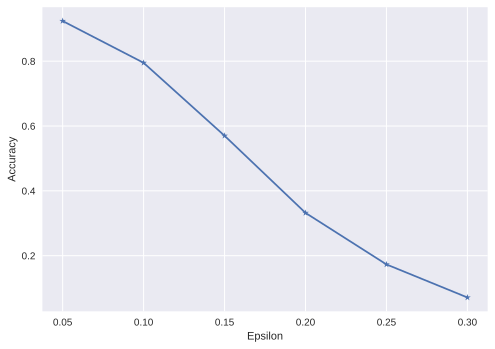

In [ ]:
plt.style.use("seaborn")
plt.plot(epsilons, accuracies, "*-")
plt.xlabel("Epsilon")
plt.ylabel("Accuracy")
plt.show()

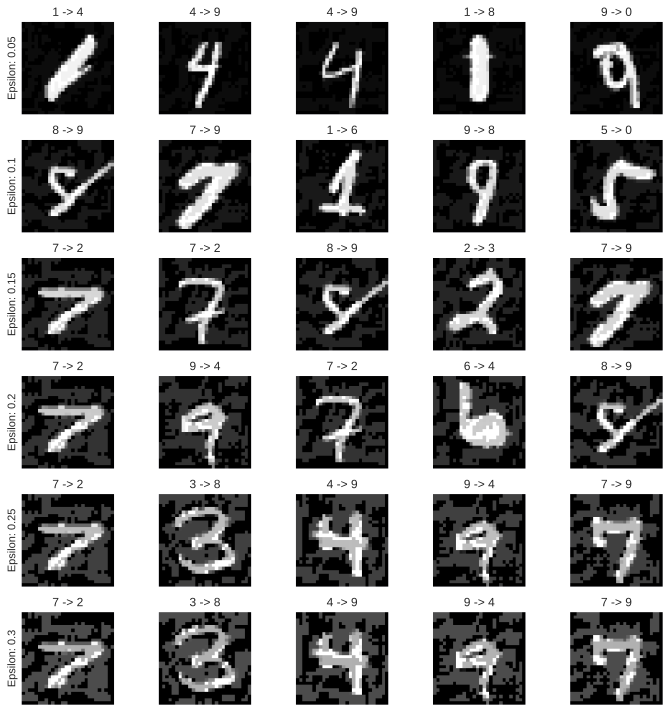

In [ ]:
def clean_axis(axis):
    axis.set_xticks([])
    axis.set_yticks([])
    axis.set_xticklabels([])
    axis.set_yticklabels([])

    
nrows = len(epsilons)
ncols = num_display

fig, ax = plt.subplots(6, 5, figsize=(10, 10))

for row in range(nrows):
    for col in range(ncols):
        label, perturbed_pred, perturbed_image = all_adv_examples[row][col]
        axis = ax[row, col]
        axis.imshow(perturbed_image, cmap="gray")
        axis.set_title(f"{label} -> {perturbed_pred}")
        clean_axis(axis)
        if col == 0:
            axis.set_ylabel(f"Epsilon: {epsilons[row]}")
plt.tight_layout()
plt.show()